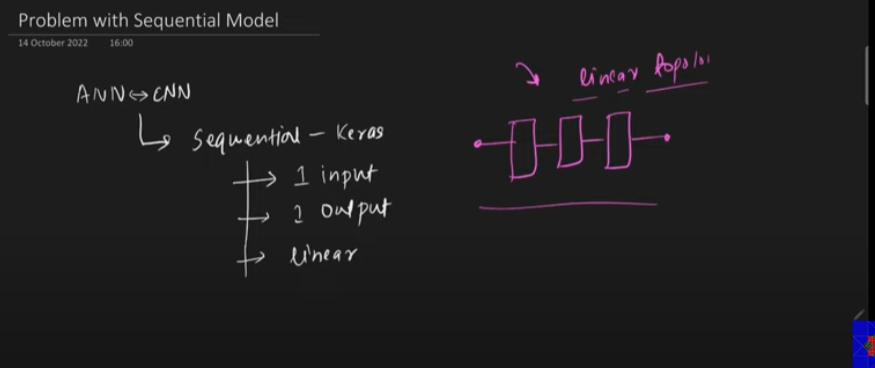

this non-linear topology
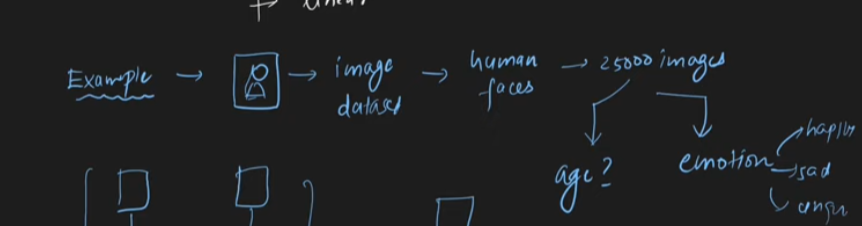
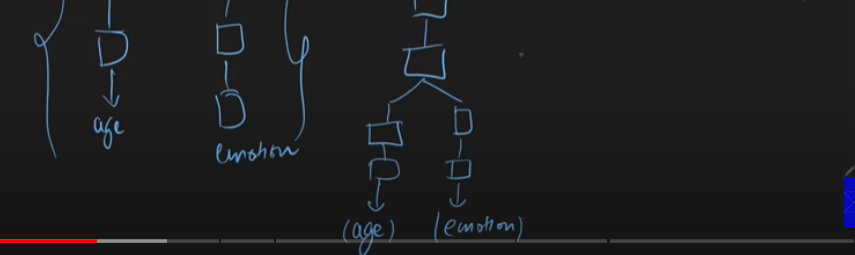

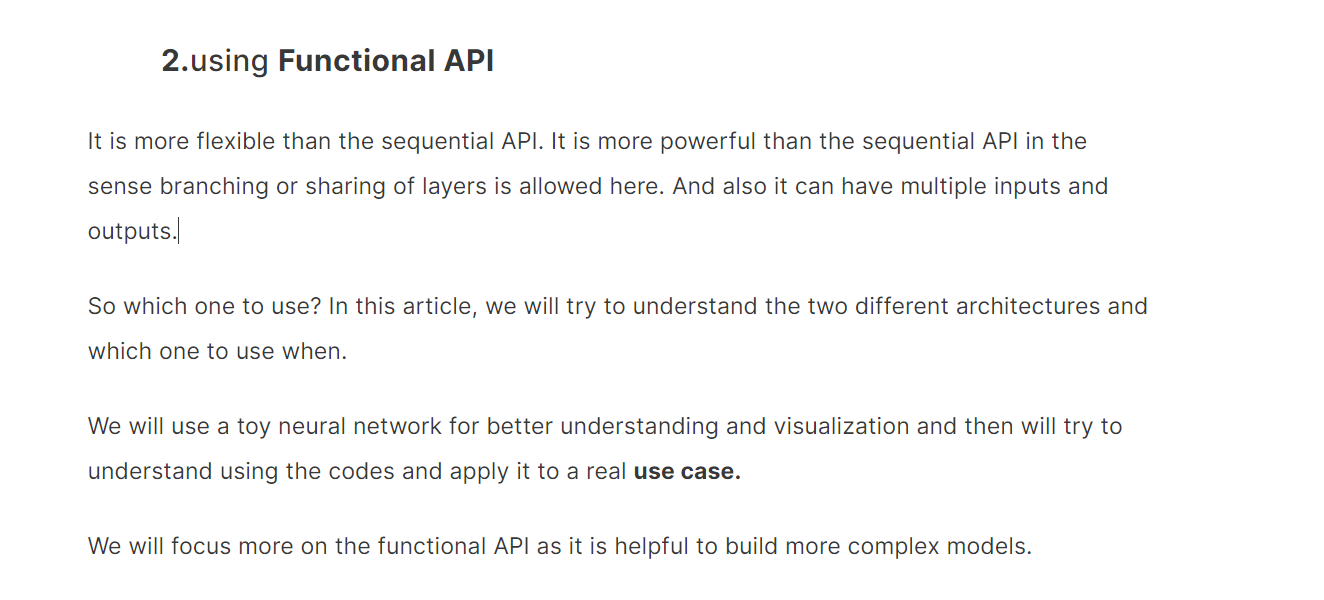

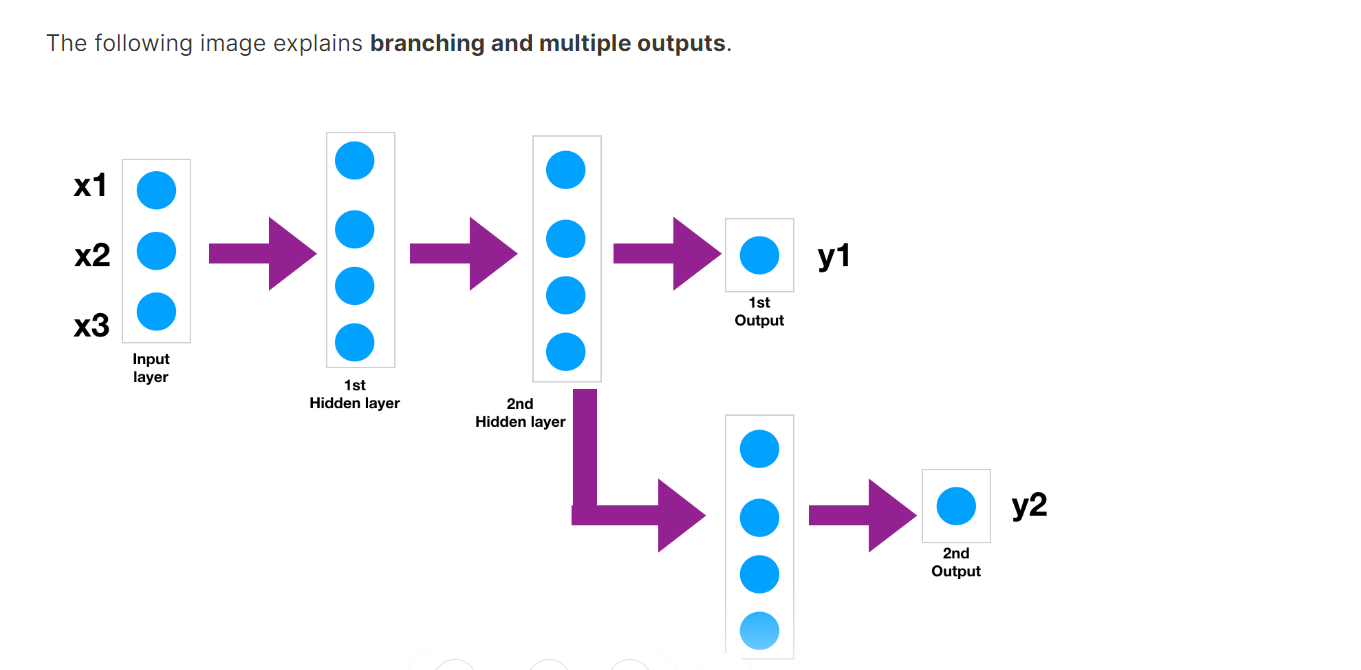

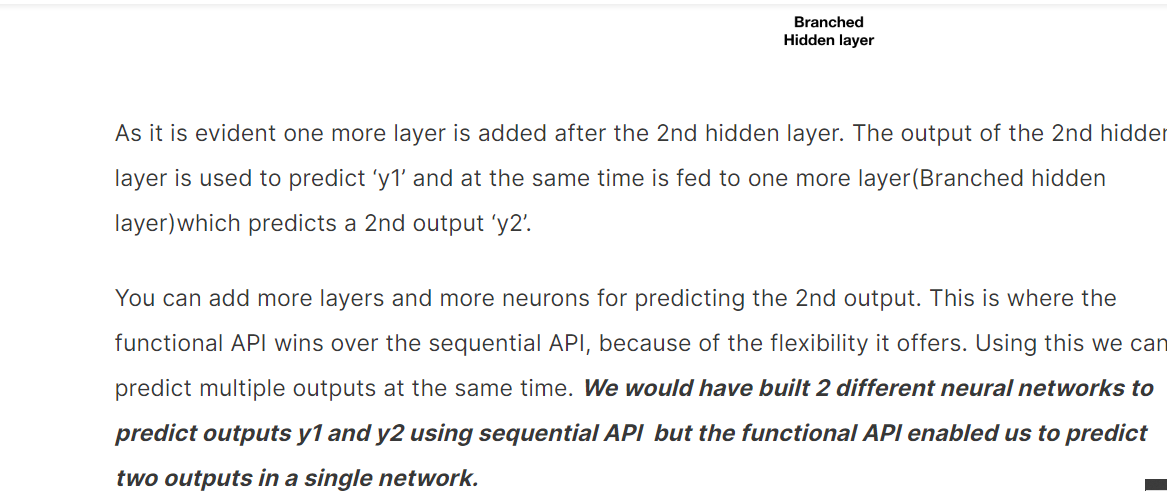

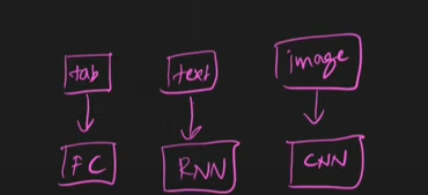
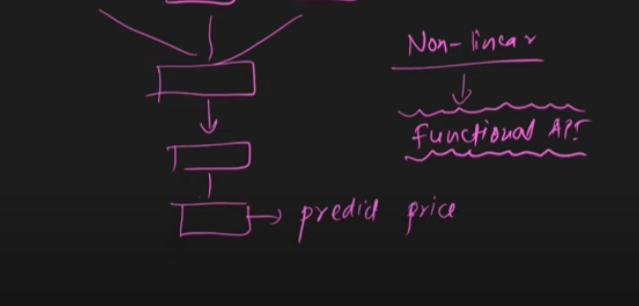

# Functional Api

In [1]:
from keras.models import Model
from keras.layers import *

In [2]:
x = Input(shape=(3,)) # 3 columns

# first hidden layer  which taking input from the x
hidden1 = Dense(128,activation='relu')(x)
# second hidden layer  which taking input from the hidden1
hidden2 = Dense(64,activation='relu')(hidden1)




# branching  to take one output from first output layer  connected to hidden layer 2
output1 = Dense(1,activation='linear')(hidden2)

# branching  to take second type  output from second output layer connected to hidden layer 2
output2 = Dense(1,activation='sigmoid')(hidden2)

In [3]:
model = Model(inputs = x,outputs = [output1,output2])

In [4]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from keras.utils import plot_model
plot_model(model)




You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


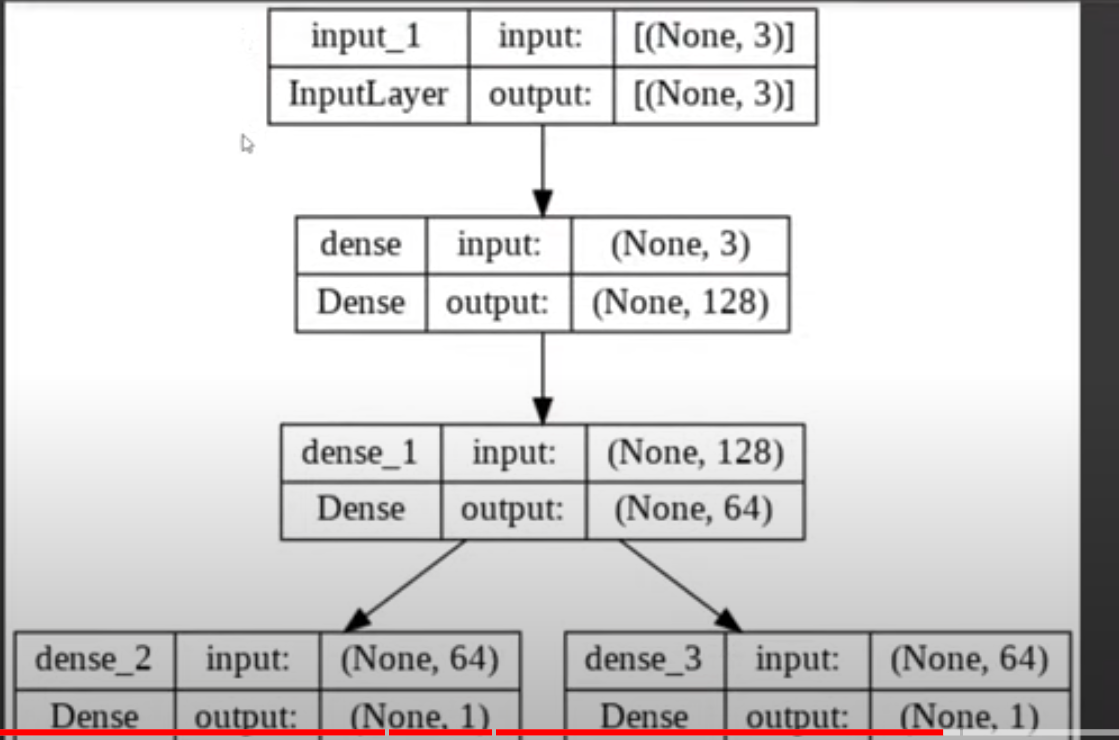

# Functional Api Multiple input

In [11]:
from keras.layers import *
from keras.models import Model

In [14]:
# define two sets of inputs A and B
inputA = Input(shape=(32,))

# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)



In [15]:
inputB = Input(shape=(128,))

# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [16]:
# combine the output of the two branches
combined = concatenate([x1, y2])

In [18]:
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [19]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z1)

In [20]:
from keras.utils import plot_model
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


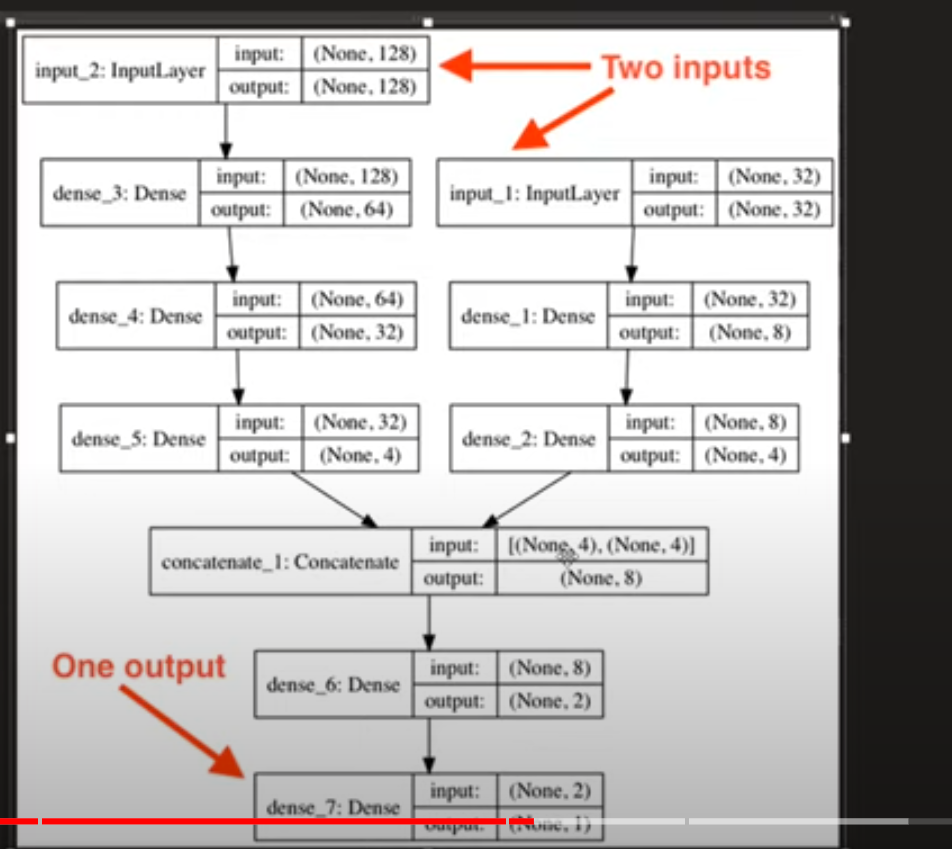